# 1. Import Dataset

In [1]:
# import packages
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import scipy
import scipy.stats as ss

In [4]:
# read the original dataset
data1 = pd.read_csv('dengue_features_train.csv', low_memory=False)
data2 = pd.read_csv('dengue_labels_train.csv', low_memory=False)

In [5]:
# volumn of the dataset
data1.shape

(1456, 24)

In [6]:
data2.shape

(1456, 4)

In [7]:
# show all the digits of quantitative variables
pd.set_option('display.float_format', lambda x: '%f'%x)

In [8]:
# convert column label to lowercases
data1.columns = map(str.lower, data1.columns)
data2.columns = map(str.lower, data2.columns)

In [9]:
# show all the digits of the quantitative variables
pd.set_option('display.max_columns', None)

In [10]:
data1.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.420000,297.572857,297.742857,292.414286,299.800000,295.900000,32.000000,73.365714,12.420000,14.012857,2.628571,25.442857,6.900000,29.400000,20.000000,16.000000
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.820000,298.211429,298.442857,293.951429,300.900000,296.400000,17.940000,77.368571,22.820000,15.372857,2.371429,26.714286,6.371429,31.700000,22.200000,8.600000
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.540000,298.781429,298.878571,295.434286,300.500000,297.300000,26.100000,82.052857,34.540000,16.848571,2.300000,26.714286,6.485714,32.200000,22.800000,41.400000
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.360000,298.987143,299.228571,295.310000,301.400000,297.000000,13.900000,80.337143,15.360000,16.672857,2.428571,27.471429,6.771429,33.300000,23.300000,4.000000
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.520000,299.518571,299.664286,295.821429,301.900000,297.500000,12.200000,80.460000,7.520000,17.210000,3.014286,28.942857,9.371429,35.000000,23.900000,5.800000


In [11]:
data2.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [12]:
data1.columns 

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [13]:
data = pd.merge(data1, data2, how='left', on=['city', 'year', 'weekofyear'])

In [14]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.420000,297.572857,297.742857,292.414286,299.800000,295.900000,32.000000,73.365714,12.420000,14.012857,2.628571,25.442857,6.900000,29.400000,20.000000,16.000000,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.820000,298.211429,298.442857,293.951429,300.900000,296.400000,17.940000,77.368571,22.820000,15.372857,2.371429,26.714286,6.371429,31.700000,22.200000,8.600000,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.540000,298.781429,298.878571,295.434286,300.500000,297.300000,26.100000,82.052857,34.540000,16.848571,2.300000,26.714286,6.485714,32.200000,22.800000,41.400000,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.360000,298.987143,299.228571,295.310000,301.400000,297.000000,13.900000,80.337143,15.360000,16.672857,2.428571,27.471429,6.771429,33.300000,23.300000,4.000000,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.520000,299.518571,299.664286,295.821429,301.900000,297.500000,12.200000,80.460000,7.520000,17.210000,3.014286,28.942857,9.371429,35.000000,23.900000,5.800000,6


In [15]:
data.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

# 2. Univariate Analysis

## Feature Extraction

In [16]:
data['temperature_gap'] = data['station_max_temp_c'] - data['station_min_temp_c']
data['max_gap'] = data['station_max_temp_c'] - data['station_avg_temp_c']

In [18]:
data['total_prec_avg'] = (data['station_precip_mm'] + data['precipitation_amt_mm'] + data['reanalysis_precip_amt_kg_per_m2'])/3
data['dur_air_temp'] = data['reanalysis_max_air_temp_k'] -  data['reanalysis_min_air_temp_k']

## Quantitative predictors distributions

In [19]:
data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,temperature_gap,max_gap,total_prec_avg,dur_air_temp
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000,1434.000000,1413.000000,1431.000000,1446.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137,10.339749,5.253919,41.758439,7.707953
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000,2.332649,1.286016,35.470953,5.197629
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000,5.500000,2.571429,0.000000,2.200000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000,8.400000,4.271429,15.033333,3.800000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000,10.000000,5.100000,33.630000,4.600000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000,12.000000,6.100000,60.041667,12.400000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000,20.400000,11.400000,235.180000,22.400000


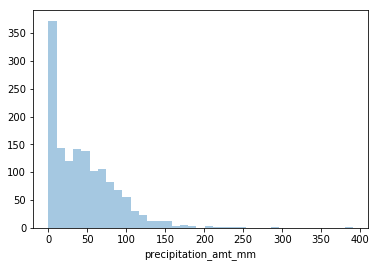

In [20]:
sns.distplot(data['precipitation_amt_mm'].dropna(), kde=False)

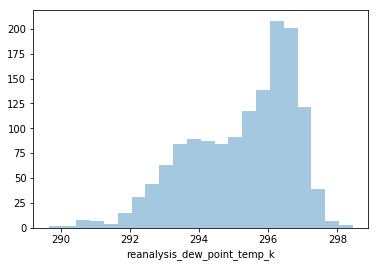

In [21]:
sns.distplot(data['reanalysis_dew_point_temp_k'].dropna(), kde=False)

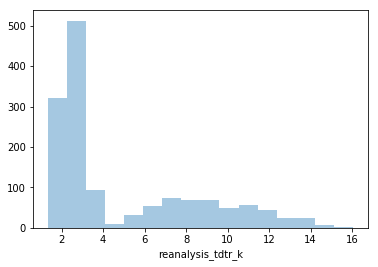

In [22]:
sns.distplot(data['reanalysis_tdtr_k'].dropna(), kde=False)

## Categorical predictor distribution

In [23]:
data['city'].unique()

array(['sj', 'iq'], dtype=object)

In [24]:
cityN = data['city'].value_counts(dropna=False)
cityN

sj    936
iq    520
Name: city, dtype: int64

In [25]:
cityF = data['city'].value_counts(dropna=False, normalize=True)
cityF

sj   0.642857
iq   0.357143
Name: city, dtype: float64

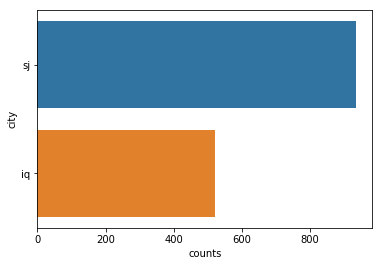

In [26]:
city = pd.DataFrame({'counts': cityN.values,
                   'city': cityN.index})
sns.barplot(x='counts', y='city', data=city)

## Target distribution

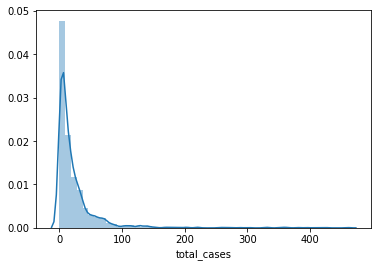

In [27]:
sns.distplot(data["total_cases"])

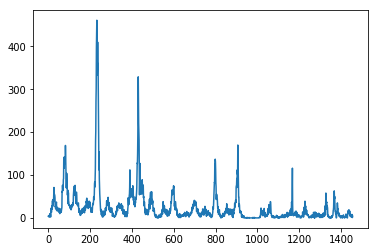

In [28]:
plt.plot(data["total_cases"])

### weekofyear -> total_cases

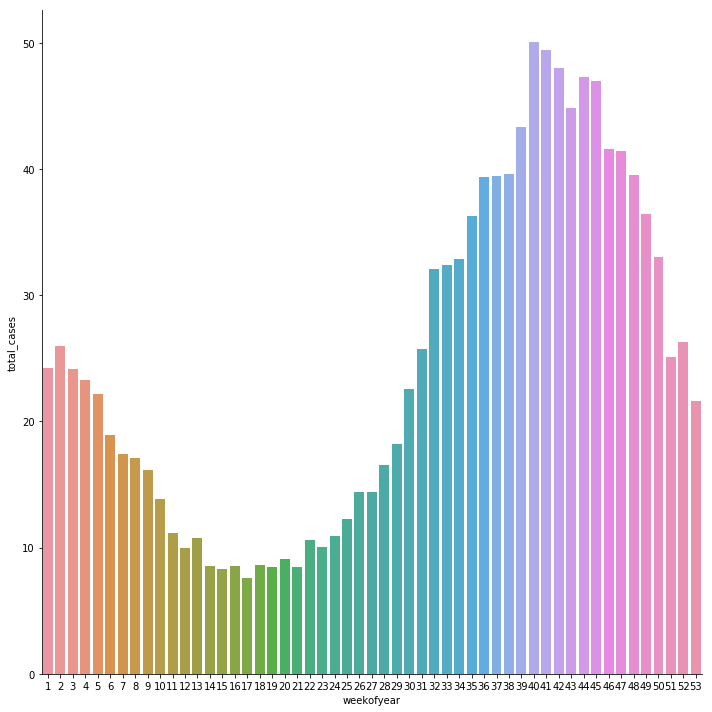

In [29]:
## Categorical -> quantitative
sns.factorplot(x="weekofyear", y='total_cases', data=data, kind="bar", ci=None, size=10)

### year -> total_cases

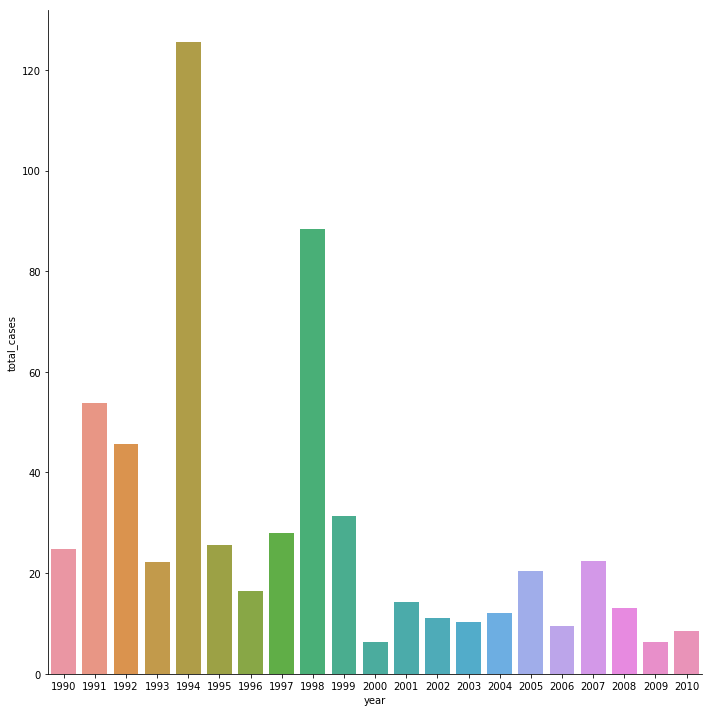

In [30]:
## Categorical -> quantitative
sns.factorplot(x="year", y='total_cases', data=data, kind="bar", ci=None, size=10)

as the above plot shows, the highest disease incidence are in years 1994 and 1998

In [31]:
data_sub = data[data['year'] > 1998].copy()

In [32]:
data_sub1 = data[(data['year'] != 1994) & (data['year'] != 1998)].copy()

In [33]:
data_sub2 = data[(data['year'] > 1999) & (data['year'] < 2009)].copy()

In [34]:
data_sub1.shape

(1352, 29)

In [35]:
data_sub.shape

(1005, 29)

In [36]:
data_sub2.shape

(875, 29)

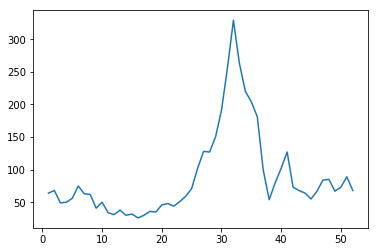

In [37]:
data_temp = data[data['year']==1998]
plt.plot(data_temp['weekofyear'], data_temp['total_cases'])

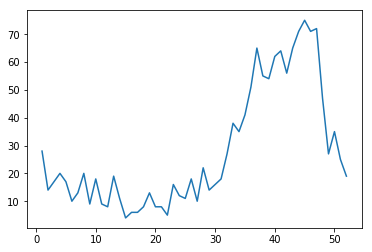

In [38]:
data_temp1 = data[(data['year']==2001) & (data['city'] == data['city'][0])]
data_temp1.sort_values(by='weekofyear')
plt.plot(data_temp1['weekofyear'], data_temp1['total_cases'])

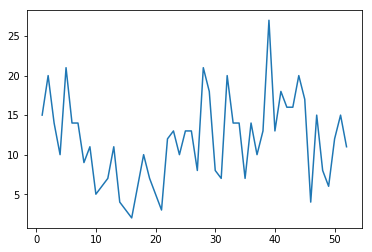

In [39]:
data_temp1 = data[(data['year']==2004) & (data['city'] == data['city'][0])]
data_temp1.sort_values(by='weekofyear')
plt.plot(data_temp1['weekofyear'], data_temp1['total_cases'])

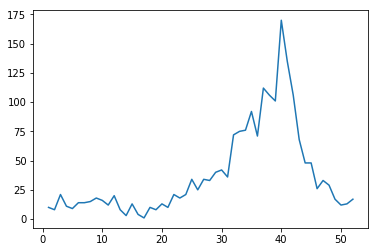

In [40]:
data_temp1 = data[(data['year']==2007) & (data['city'] == data['city'][0])]
data_temp1.sort_values(by='weekofyear')
plt.plot(data_temp1['weekofyear'], data_temp1['total_cases'])

## week_start_date to month

In [42]:
data_sub2.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'temperature_gap', 'max_gap', 'total_prec_avg', 'dur_air_temp'],
      dtype='object')

In [45]:
type(data_sub2['week_start_date'].iloc[0])

str

In [46]:
data_sub2['week_start_date'] = pd.to_datetime(data_sub2['week_start_date'], format="%Y-%m-%d")

In [51]:
type(data_sub2['week_start_date'].iloc[0])

pandas._libs.tslib.Timestamp

In [52]:
data_sub2['month'] = data_sub2['week_start_date'].map(lambda x:x.month)

### month -> total_cases

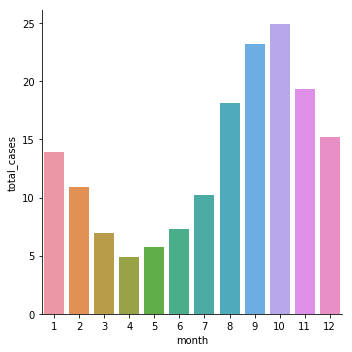

In [53]:
## Categorical -> quantitative
sns.factorplot(x="month", y='total_cases', data=data_sub2, kind="bar", ci=None, size=5)

# 3. Bivariate Analysis

In [54]:
data_sub2 = data_sub2.drop(['week_start_date', 'year'], axis=1)

In [55]:
data_sub2.head()

,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,temperature_gap,max_gap,total_prec_avg,dur_air_temp,month
503,sj,52,-0.133600,-0.061225,0.168200,0.086311,40.350000,298.367143,298.307143,293.887143,300.300000,296.400000,12.340000,76.317143,40.350000,15.257143,2.642857,25.471429,6.557143,29.400000,21.100000,7.900000,17,8.300000,3.928571,20.196667,3.900000,1
504,sj,1,0.206350,0.161300,0.139883,0.095833,81.730000,298.148571,298.164286,294.355714,299.900000,296.500000,32.300000,79.607143,81.730000,15.722857,1.900000,25.128571,5.314286,29.400000,21.700000,28.600000,16,7.700000,4.271429,47.543333,3.400000,1
505,sj,2,0.337000,0.307850,0.246686,0.168629,45.190000,297.441429,297.585714,293.191429,299.100000,296.100000,47.100000,77.342857,45.190000,14.612857,2.057143,25.114286,5.157143,28.300000,21.700000,12.000000,23,6.600000,3.185714,34.763333,3.000000,1
506,sj,3,0.353000,0.307300,0.326271,0.291429,0.000000,296.588571,296.478571,290.852857,299.000000,293.200000,14.700000,70.457143,0.000000,12.610000,1.842857,23.614286,4.828571,27.200000,20.000000,17.700000,18,7.200000,3.585714,10.800000,5.800000,1
507,sj,4,0.341900,0.228000,0.329750,0.381420,0.000000,296.184286,296.364286,289.827143,299.000000,292.600000,0.700000,67.765714,0.000000,11.964286,3.100000,22.842857,6.842857,28.300000,17.800000,2.000000,18,10.500000,5.457143,0.900000,6.400000,1


In [56]:
data_sub2.describe()

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,temperature_gap,max_gap,total_prec_avg,dur_air_temp,month
count,875.000000,796.000000,859.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,838.000000,838.000000,861.000000,867.000000,863.000000,875.000000,859.000000,838.000000,863.000000,871.000000,875.000000
mean,26.518857,0.161231,0.140054,0.216770,0.216739,50.340850,298.616708,299.313638,295.239761,304.402181,295.054765,39.508576,82.850180,50.340850,16.760930,6.073298,27.183724,8.471118,32.625900,21.878893,47.479722,13.466286,10.731898,5.425465,45.776933,9.347417,6.428571
std,15.064030,0.155038,0.134573,0.077928,0.090465,44.292163,1.467350,1.330964,1.528508,3.373396,2.800976,42.529816,7.971426,44.292163,1.541079,3.785285,1.263367,2.303396,2.014186,1.593036,54.912482,19.529294,2.511527,1.363765,37.692826,5.547845,3.467120
min,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.657143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000,5.500000,2.571429,0.000000,2.500000,1.000000
25%,13.000000,0.041737,0.036642,0.162900,0.152458,15.930000,297.597857,298.328571,294.138571,301.750000,292.900000,11.880000,76.728571,15.930000,15.587857,2.664286,26.400000,6.528571,31.700000,20.800000,10.200000,3.000000,8.900000,4.328571,16.955000,4.100000,3.000000
50%,27.000000,0.185925,0.150514,0.209414,0.204357,44.450000,298.452857,299.292857,295.608571,303.600000,294.900000,26.700000,80.178571,44.450000,17.064286,4.828571,27.400000,7.771429,32.800000,21.800000,28.200000,7.000000,10.500000,5.330952,37.850000,8.400000,7.000000
75%,40.000000,0.284762,0.239305,0.266307,0.273213,74.375000,299.811429,300.417857,296.492857,307.200000,297.500000,52.200000,90.440000,74.375000,18.011429,9.107143,28.100000,10.400000,34.000000,22.800000,69.000000,16.000000,12.700000,6.350000,64.608333,14.200000,9.000000
max,53.000000,0.501029,0.445000,0.473400,0.546017,390.600000,302.200000,302.928571,297.852857,314.000000,299.900000,362.030000,98.457143,390.600000,19.731429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,170.000000,20.400000,11.400000,235.180000,22.400000,12.000000


In [57]:
data_sub2[['city', 'weekofyear']].duplicated().sum()

769

## Pearson Correlations analysis

In [58]:
data_temp = data_sub2.dropna()
scipy.stats.pearsonr(data_temp['ndvi_ne'], data_temp['ndvi_nw'])

(0.8707942408974504, 3.7433604081597586e-233)

In [59]:
data_sub2.columns

Index(['city', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'temperature_gap', 'max_gap', 'total_prec_avg', 'dur_air_temp',
       'month'],
      dtype='object')

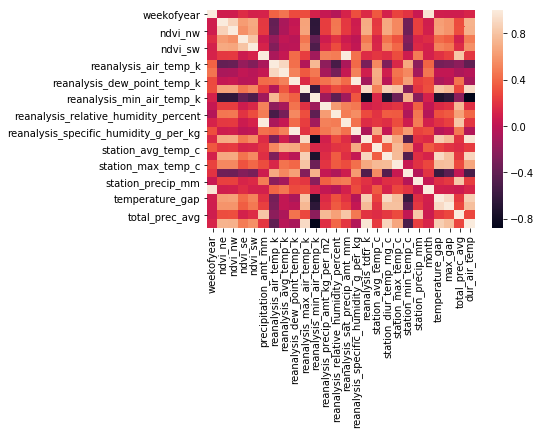

In [60]:
corrdata = data_sub2[['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month', 'temperature_gap', 'max_gap','total_prec_avg', 'dur_air_temp']].corr()
sns.heatmap(corrdata)

In [61]:
# corrdata[corrdata > 0.75]

In [62]:
corr_max = []
    
for idx in corrdata.index:
    for column in corrdata.columns:
        if (idx != column) and (corrdata.loc[idx, column] > 0.75):
            temp = [idx, column]
            corr_max.append(temp)

print('High corr predictors')

High corr predictors


In [63]:
corr_max

[['weekofyear', 'month'],
 ['ndvi_ne', 'ndvi_nw'],
 ['ndvi_nw', 'ndvi_ne'],
 ['ndvi_se', 'ndvi_sw'],
 ['ndvi_sw', 'ndvi_se'],
 ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm'],
 ['precipitation_amt_mm', 'total_prec_avg'],
 ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k'],
 ['reanalysis_avg_temp_k', 'reanalysis_air_temp_k'],
 ['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg'],
 ['reanalysis_max_air_temp_k', 'reanalysis_tdtr_k'],
 ['reanalysis_max_air_temp_k', 'station_diur_temp_rng_c'],
 ['reanalysis_max_air_temp_k', 'station_max_temp_c'],
 ['reanalysis_max_air_temp_k', 'temperature_gap'],
 ['reanalysis_max_air_temp_k', 'dur_air_temp'],
 ['reanalysis_precip_amt_kg_per_m2', 'total_prec_avg'],
 ['reanalysis_sat_precip_amt_mm', 'precipitation_amt_mm'],
 ['reanalysis_sat_precip_amt_mm', 'total_prec_avg'],
 ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k'],
 ['reanalysis_tdtr_k', 'reanalysis_max_air_temp_k'],
 ['reanalysis_tdtr_k', 'stat

In [64]:
len(corr_max)

58

As the list shows, these pair of predictors are highly correlated:<br>
['weekofyear', 'month']<br>
['ndvi_ne', 'ndvi_nw']<br>
['ndvi_se', 'ndvi_sw']<br>
['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm']<br>
['reanalysis_air_temp_k', 'reanalysis_avg_temp_k']<br>
 ['reanalysis_avg_temp_k', 'station_avg_temp_c']<br>
['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg']<br>
['reanalysis_max_air_temp_k', 'reanalysis_tdtr_k']<br>
['reanalysis_max_air_temp_k', 'station_diur_temp_rng_c']<br>
['reanalysis_max_air_temp_k', 'station_max_temp_c']<br>
['station_diur_temp_rng_c', 'reanalysis_tdtr_k']<br>
['station_max_temp_c', 'station_avg_temp_c']<br>
['temperature_gap', 'reanalysis_max_air_temp_k']<br>
['temperature_gap', 'reanalysis_tdtr_k']<br>
['temperature_gap', 'station_diur_temp_rng_c']<br>
['temperature_gap', 'max_gap']<br>
['max_gap', 'station_diur_temp_rng_c']<br>
 ['max_gap', 'station_max_temp_c']<br>

In [53]:
corr_map = [['weekofyear', 'month'], ['ndvi_ne', 'ndvi_nw'],['ndvi_se', 'ndvi_sw'], ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm'],
['reanalysis_air_temp_k', 'reanalysis_avg_temp_k'], ['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg'],
['reanalysis_max_air_temp_k', 'reanalysis_tdtr_k'], ['reanalysis_max_air_temp_k', 'station_diur_temp_rng_c'], ['reanalysis_max_air_temp_k', 'station_max_temp_c'],
['station_diur_temp_rng_c', 'reanalysis_tdtr_k'], ['station_max_temp_c', 'station_avg_temp_c'], ['temperature_gap', 'reanalysis_max_air_temp_k'],
['temperature_gap', 'reanalysis_tdtr_k'], ['temperature_gap', 'station_diur_temp_rng_c'], ['temperature_gap', 'max_gap'], ['max_gap', 'station_diur_temp_rng_c'],
['max_gap', 'station_max_temp_c'], ['reanalysis_avg_temp_k', 'station_avg_temp_c']]

In [54]:
len(corr_map)

18

In [55]:
pred1 = []
pred2 = []

for item in corr_map:
    pred1.append(item[0])
    pred2.append(item[1])

In [56]:
corr_value = []

for idx in range (0, len(corr_map)):
    x = corr_map[idx][0]
    y = corr_map[idx][1]
    corr_value.append(corrdata.loc[x, y])

corr_df = pd.DataFrame({'pred1': pred1,
                        'pred2': pred2,
                       'corr_parameter': corr_value}).sort_values(by='corr_parameter', ascending=False)

In [57]:
corr_df

,corr_parameter,pred1,pred2
3,1.000000,precipitation_amt_mm,reanalysis_sat_precip_amt_mm
5,0.997051,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg
0,0.958415,weekofyear,month
14,0.920358,temperature_gap,max_gap
6,0.918578,reanalysis_max_air_temp_k,reanalysis_tdtr_k
4,0.901777,reanalysis_air_temp_k,reanalysis_avg_temp_k
13,0.901208,temperature_gap,station_diur_temp_rng_c
9,0.881176,station_diur_temp_rng_c,reanalysis_tdtr_k
1,0.850902,ndvi_ne,ndvi_nw
7,0.834263,reanalysis_max_air_temp_k,station_diur_temp_rng_c


## Chi-Square Analysis
weekofyear, city, month

In [58]:
ctcm = pd.crosstab(data['city'], data['month'])

In [59]:
# chi-square
print("x^2 value, p-value, expected counts")
ss.chi2_contingency(ctcm)

x^2 value, p-value, expected counts


(0.017337461300309595,
 0.9999999999999842,
 11,
 array([[50. , 40. , 40. , 50. , 40. , 40. , 50. , 40. , 42.5, 47.5, 40. ,
         40. ],
        [90. , 72. , 72. , 90. , 72. , 72. , 90. , 72. , 76.5, 85.5, 72. ,
         72. ]]))

# Multivariable analyses

In [ ]:
import statsmodels.stats.multicomp as multi

# Feature Normalization

In [65]:
data_sub2.columns

Index(['city', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'temperature_gap', 'max_gap', 'total_prec_avg', 'dur_air_temp',
       'month'],
      dtype='object')

## Quantitative predictors -> Target

In [66]:
data_sub2[['station_precip_mm', 'total_cases']].corr()

,station_precip_mm,total_cases
station_precip_mm,1.000000,-0.058253
total_cases,-0.058253,1.000000


In [67]:
no_sene_col = ['city', 'weekofyear', 'month', 'total_cases']

corr_cal_col = [i for i in data_temp.columns if i not in no_sene_col]

cor_val = []
for i in corr_cal_col:
    cor_val_tmp = abs(data_temp[[i, 'total_cases']].corr().iloc[0, 1])
    #cor_val_tmp = np.corrcoef(data[i], data['total_cases'])
    cor_val.append([i,cor_val_tmp])
res = pd.DataFrame(cor_val, columns=['feture_name', 'cor_val'])
# print(pd.DataFrame(cor_val, columns=['feture_name', 'cor_val']))

In [68]:
res2 = res.sort_values(by='cor_val', ascending=False)
print(res2)

                              feture_name  cor_val
5                   reanalysis_air_temp_k 0.420956
9               reanalysis_min_air_temp_k 0.410499
18                     station_min_temp_c 0.358623
6                   reanalysis_avg_temp_k 0.310246
23                           dur_air_temp 0.309007
14                      reanalysis_tdtr_k 0.288354
16                station_diur_temp_rng_c 0.280491
20                        temperature_gap 0.269176
7             reanalysis_dew_point_temp_k 0.265454
0                                 ndvi_ne 0.258359
13  reanalysis_specific_humidity_g_per_kg 0.257163
21                                max_gap 0.227570
1                                 ndvi_nw 0.222629
3                                 ndvi_sw 0.179301
8               reanalysis_max_air_temp_k 0.169603
11   reanalysis_relative_humidity_percent 0.164985
15                     station_avg_temp_c 0.157776
2                                 ndvi_se 0.156498
19                      station

## Missing Data Percent of Every Predictor

In [69]:
# calculate missing data
miss_count = [[i, data_sub2[i].isnull().sum(), data_sub2[i].isnull().sum()/len(data_sub2)] for i in data_sub2.columns]
miss_count = pd.DataFrame(miss_count, columns=['columns', 'miss_cnt', 'prenc'])
miss_count = miss_count.sort_values(by='prenc', ascending=False)
miss_count

,columns,miss_cnt,prenc
2,ndvi_ne,79,0.090286
18,station_diur_temp_rng_c,37,0.042286
17,station_avg_temp_c,37,0.042286
24,max_gap,37,0.042286
23,temperature_gap,16,0.018286
3,ndvi_nw,16,0.018286
19,station_max_temp_c,14,0.016000
25,total_prec_avg,12,0.013714
21,station_precip_mm,12,0.013714
20,station_min_temp_c,8,0.009143


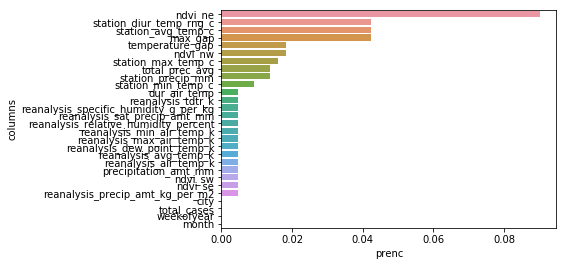

In [70]:
sns.barplot(x="prenc",y="columns",data=miss_count)

In [71]:
len(miss_count)

28

In [72]:
data_t = data_sub2[data_sub2.isnull().any(axis=1)].copy()

In [73]:
data_t.shape

(124, 28)

In [74]:
data_t[(data_t['total_cases']==0)|(data_t['total_cases']==1)].shape

(16, 28)

In [75]:
16/124

0.12903225806451613

#### there only 7% sample with NAN value have lower dengue fever incidence, so cannot delete sample with NAN value. Using 50% quantile to fill up NAN value

## Predictor/Target Correlation Parameter

In [83]:
data_sub2 = data_sub2.fillna(data_sub2.quantile(.5))

In [84]:
no_sene_col = ['city', 'weekofyear', 'month', 'total_cases']

corr_cal_col = [i for i in data_sub2.columns if i not in no_sene_col]

cor_val = []
for i in corr_cal_col:
    cor_val_tmp = abs(data_sub2[[i, 'total_cases']].corr().iloc[0, 1])
    #cor_val_tmp = np.corrcoef(data[i], data['total_cases'])
    cor_val.append([i,cor_val_tmp])
res = pd.DataFrame(cor_val, columns=['feture_name', 'cor_val'])
# print(pd.DataFrame(cor_val, columns=['feture_name', 'cor_val']))

In [85]:
res2 = res.sort_values(by='cor_val', ascending=False)
print(res2)

                              feture_name  cor_val
5                   reanalysis_air_temp_k 0.419135
9               reanalysis_min_air_temp_k 0.402533
18                     station_min_temp_c 0.351413
6                   reanalysis_avg_temp_k 0.320924
23                           dur_air_temp 0.293874
7             reanalysis_dew_point_temp_k 0.279303
14                      reanalysis_tdtr_k 0.273841
13  reanalysis_specific_humidity_g_per_kg 0.272431
16                station_diur_temp_rng_c 0.263691
20                        temperature_gap 0.246121
0                                 ndvi_ne 0.216921
21                                max_gap 0.215149
1                                 ndvi_nw 0.202736
15                     station_avg_temp_c 0.174822
3                                 ndvi_sw 0.157803
8               reanalysis_max_air_temp_k 0.149166
11   reanalysis_relative_humidity_percent 0.145850
2                                 ndvi_se 0.132756
19                      station

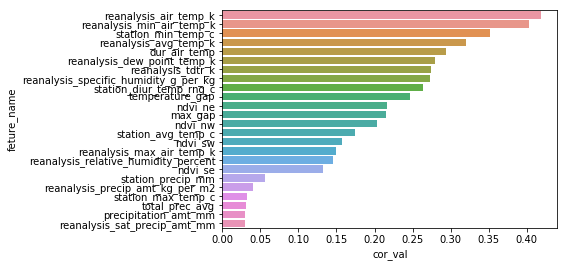

In [86]:
sns.barplot(x="cor_val",y="feture_name",data=res2)

## Normalization

In [87]:
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder, StandardScaler

In [88]:
data_quan =  data_sub2[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 
       'temperature_gap', 'max_gap', 'weekofyear', 'month', 'total_prec_avg', 'dur_air_temp']]
normalModel = StandardScaler(with_mean=True, with_std=True)
normalModel.fit(data_quan)
data_norm = pd.DataFrame(normalModel.transform(data_quan),
                             columns=data_quan.columns)

## One Hot Encoding

In [89]:
data_cat = data_sub2[['city']]
data_label = pd.DataFrame()
class_ = {}
for i in data_cat.columns:
    labelModeli = LabelEncoder()
    labelModeli.fit(data_cat[i])
    class_.update({i: labelModeli.classes_})
    ip = pd.DataFrame({i: labelModeli.transform(data_cat[i])})
    data_label = pd.concat([data_label, ip], axis=1, ignore_index=False)


onehotModel = OneHotEncoder(n_values='auto', categorical_features='all', sparse=False)
onehotModel.fit(data_label)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [90]:
varlable = list()
for i in list(data_cat.columns):
    univaue = class_.get(i)
    try:
        varN = list(i + ":" + univaue)
    except TypeError:
        varN = []
        for item in univaue:
            varN.append(i +':'+str(item))
    varlable = varlable + varN
    
data_onehot = pd.DataFrame(onehotModel.transform(data_label),
                                columns=varlable)

In [91]:
modelDataX = pd.concat([data_onehot,data_norm],axis=1)
modelDataX.head()

,city:iq,city:sj,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,temperature_gap,max_gap,weekofyear,month,total_prec_avg,dur_air_temp
0,0.000000,1.000000,-2.007841,-1.511784,-0.624608,-1.445194,-0.225595,-0.170050,-0.758313,-0.888454,-1.218281,0.481902,-0.639132,-0.820161,-0.225595,-0.979417,-0.907126,-1.392306,-0.834827,-1.616795,-0.491009,-0.720732,-0.976059,-1.119148,1.692490,-1.566625,-0.680637,-0.983867
1,0.000000,1.000000,0.289889,0.157992,-0.989012,-1.339638,0.711299,-0.319430,-0.865954,-0.581060,-1.337180,0.517706,-0.168565,-0.406359,0.711299,-0.676377,-1.103889,-1.669609,-1.385441,-1.616795,-0.112422,-0.341258,-1.217293,-0.862125,-1.694995,-1.566625,0.050106,-1.074244
2,0.000000,1.000000,1.172956,1.257669,0.385415,-0.532685,-0.116012,-0.802717,-1.301903,-1.344858,-1.574980,0.374490,0.180352,-0.691151,-0.116012,-1.398654,-1.062266,-1.681164,-1.455059,-2.167631,-0.112422,-0.645570,-1.659557,-1.676029,-1.628574,-1.566625,-0.291394,-1.146546
3,0.000000,1.000000,1.281100,1.253542,1.409593,0.828583,-1.139169,-1.385591,-2.136124,-2.879014,-1.604705,-0.663827,-0.583494,-1.557207,-1.139169,-2.701914,-1.119024,-2.894367,-1.600624,-2.718466,-1.185086,-0.541078,-1.418322,-1.376170,-1.562152,-1.566625,-0.931729,-0.640432
4,0.000000,1.000000,1.206075,0.658493,1.454359,1.826160,-1.139169,-1.661895,-2.222237,-3.551906,-1.604705,-0.878651,-0.913551,-1.895723,-1.139169,-3.122081,-0.786041,-3.518301,-0.708249,-2.167631,-2.573239,-0.828891,-0.091531,0.026743,-1.495731,-1.566625,-1.196271,-0.531978


# Feature Selection

## Select by Anova

In [92]:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif, SelectFromModel

In [93]:
modelDataX.shape

(875, 28)

In [94]:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif, SelectFromModel

In [95]:
quan_col = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 
       'temperature_gap', 'max_gap', 'weekofyear', 'month', 'total_prec_avg', 'dur_air_temp']

In [96]:
fea_sel = SelectPercentile(f_classif, percentile=90)
fea_sel = fea_sel.fit(modelDataX[quan_col], data_sub2["total_cases"])
pred_imp_anova = modelDataX[quan_col].columns[fea_sel.get_support(indices=False)]

In [97]:
pred_imp_anova

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c',
       'station_max_temp_c', 'station_min_temp_c', 'temperature_gap',
       'max_gap', 'weekofyear', 'month', 'dur_air_temp'],
      dtype='object')

In [98]:
len(quan_col)

26

In [99]:
len(pred_imp_anova)

23

## Select by XGBoost

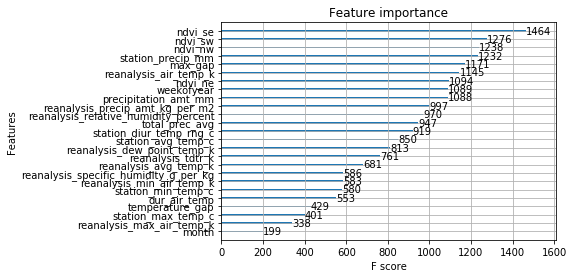

In [100]:
from xgboost import XGBClassifier
from xgboost import plot_importance
# fit model no training data
model_pred = XGBClassifier()
model_pred.fit(modelDataX[quan_col], data_sub2['total_cases'])
# plot feature importance
plot_importance(model_pred)
plt.show()

In [101]:
from sklearn.metrics import roc_auc_score,confusion_matrix ,roc_curve,auc
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

In [102]:
select_xgb = SelectFromModel(model_pred, threshold=0.001, prefit=False)

In [103]:
select_xgb = select_xgb.fit(modelDataX[quan_col], data_sub2['total_cases'])
pred_imp_xgb = modelDataX[quan_col].columns[select_xgb.get_support(indices=False)]

In [104]:
pred_imp_xgb

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'temperature_gap', 'max_gap',
       'weekofyear', 'month', 'total_prec_avg', 'dur_air_temp'],
      dtype='object')

In [105]:
weight = model_pred.feature_importances_
weight

array([0.05111194, 0.05783965, 0.06839843, 0.05961502, 0.05083162,
       0.05349467, 0.03181648, 0.03798356, 0.01579144, 0.0272379 ,
       0.04658008, 0.04531863, 0.        , 0.02737806, 0.0355541 ,
       0.0397122 , 0.0429359 , 0.01873482, 0.02709774, 0.05755933,
       0.02004298, 0.0547094 , 0.05087834, 0.00929733, 0.04424407,
       0.02583629], dtype=float32)

In [106]:
imp_df = pd.DataFrame({'predictor': quan_col,
                      'weight': weight})

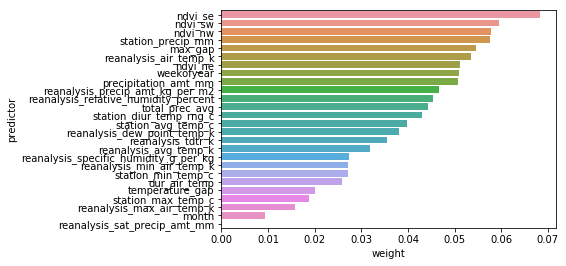

In [107]:
imp_df = imp_df.sort_values('weight', ascending=False)
sns.barplot(x="weight",y="predictor",data=imp_df)

In [108]:
imp_df

,predictor,weight
2,ndvi_se,0.068398
3,ndvi_sw,0.059615
1,ndvi_nw,0.057840
19,station_precip_mm,0.057559
21,max_gap,0.054709
5,reanalysis_air_temp_k,0.053495
0,ndvi_ne,0.051112
22,weekofyear,0.050878
4,precipitation_amt_mm,0.050832
10,reanalysis_precip_amt_kg_per_m2,0.046580


In [109]:
len(pred_imp_xgb)

25

In [110]:
for column in data_quan:
    if column not in pred_imp_xgb:
        print(column)

reanalysis_sat_precip_amt_mm


In [112]:
data_sub2.head()

,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,temperature_gap,max_gap,total_prec_avg,dur_air_temp,month
503,sj,52,-0.133600,-0.061225,0.168200,0.086311,40.350000,298.367143,298.307143,293.887143,300.300000,296.400000,12.340000,76.317143,40.350000,15.257143,2.642857,25.471429,6.557143,29.400000,21.100000,7.900000,17,8.300000,3.928571,20.196667,3.900000,1
504,sj,1,0.206350,0.161300,0.139883,0.095833,81.730000,298.148571,298.164286,294.355714,299.900000,296.500000,32.300000,79.607143,81.730000,15.722857,1.900000,25.128571,5.314286,29.400000,21.700000,28.600000,16,7.700000,4.271429,47.543333,3.400000,1
505,sj,2,0.337000,0.307850,0.246686,0.168629,45.190000,297.441429,297.585714,293.191429,299.100000,296.100000,47.100000,77.342857,45.190000,14.612857,2.057143,25.114286,5.157143,28.300000,21.700000,12.000000,23,6.600000,3.185714,34.763333,3.000000,1
506,sj,3,0.353000,0.307300,0.326271,0.291429,0.000000,296.588571,296.478571,290.852857,299.000000,293.200000,14.700000,70.457143,0.000000,12.610000,1.842857,23.614286,4.828571,27.200000,20.000000,17.700000,18,7.200000,3.585714,10.800000,5.800000,1
507,sj,4,0.341900,0.228000,0.329750,0.381420,0.000000,296.184286,296.364286,289.827143,299.000000,292.600000,0.700000,67.765714,0.000000,11.964286,3.100000,22.842857,6.842857,28.300000,17.800000,2.000000,18,10.500000,5.457143,0.900000,6.400000,1


## Dimensions Reduction

In [113]:
modelDataX = modelDataX.drop('reanalysis_sat_precip_amt_mm', axis=1)

In [114]:
len(modelDataX.columns)

27

In [115]:
modelDataX.columns

Index(['city:iq', 'city:sj', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'temperature_gap', 'max_gap',
       'weekofyear', 'month', 'total_prec_avg', 'dur_air_temp'],
      dtype='object')

# Model Training

In [116]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics
import gc
import warnings
import  common as com
warnings.filterwarnings('ignore')

In [161]:
# Loss function
def getModelAcc(model, x, y):
    '''
    实现模型的效果评估
    :param model:
    :param x:
    :param y:
    :return:
    '''

    explained_variance = cross_val_score(model, x, y,
                                         cv=10,
                                         scoring="explained_variance").mean()
    mean_absolute_error = cross_val_score(model, x, y,
                                              cv=10,
                                              scoring="mean_absolute_error").mean()
    mean_squared_error = cross_val_score(model, x, y,
                                             cv=10,
                                             scoring="mean_squared_error").mean()
    median_absolute_error = cross_val_score(model, x, y,
                                                cv=10,
                                                scoring="median_absolute_error").mean()
    r2 = cross_val_score(model, x, y,cv=10,scoring="r2").mean()

    accData = {"explained_variance": explained_variance,
               "mean_absolute_error": mean_absolute_error,
               "mean_squared_error": mean_squared_error,
               "median_absolute_error": median_absolute_error,
               "r2": r2}

    retData = {"accData": accData}
    return (retData)

# 3.3 模型残差函数
def getModelResPlot(model, trainX, trainY, testX, testY):
    '''
    实现模型的效果评估
    :param model:
    :param x:
    :param y:
    :return:
    '''

    plt.figure()
    plt.subplot(1,2,1)
    sns.residplot(model.predict(trainX), trainY)
    # 提取X的主成分
    pcaModel = PCA(n_components=1, copy=True, whiten=False,
                    svd_solver="auto", tol = 0.0, iterated_power ="auto")
    xpca= pcaModel.fit_transform(trainX).reshape((-1))
    y1= model.predict(trainX).reshape((-1))
    plt.subplot(1, 2, 2)
    lmdata = pd.DataFrame({"xPCA1":xpca,"y":trainY.reshape((-1)),"y_predict":y1},index=range(0,len(y1)))

    sns.regplot(x="xPCA1",y="y",data=lmdata)
    sns.regplot(x="xPCA1",y="y_predict",data=lmdata)

    plt.show()

    return (1)

def getModelResPlot_t(model, trainX, trainY, testX, testY):
    '''
    实现模型的效果评估
    :param model:
    :param x:
    :param y:
    :return:
    '''

    plt.figure()
    plt.subplot(1,2,1)
    sns.residplot(model.predict(testX), testY)
    # 提取X的主成分
    pcaModel = PCA(n_components=1, copy=True, whiten=False,
                    svd_solver="auto", tol = 0.0, iterated_power ="auto")
    xpca= pcaModel.fit_transform(testX).reshape((-1))
    y1= model.predict(testX).reshape((-1))
    plt.subplot(1, 2, 2)
    lmdata = pd.DataFrame({"xPCA1":xpca,"y":testY.reshape((-1)),"y_predict":y1},index=range(0,len(y1)))

    sns.regplot(x="xPCA1",y="y",data=lmdata)
    sns.regplot(x="xPCA1",y="y_predict",data=lmdata)

    plt.show()

    return (1)

In [118]:
trainDataX = modelDataX
trainDataY = data_sub2["total_cases"]

# Split Dataset
trainX, testX, trainY, testY = train_test_split(trainDataX, trainDataY,
                                               test_size=0.3,
                                                random_state=1234567)

## Linear Regression

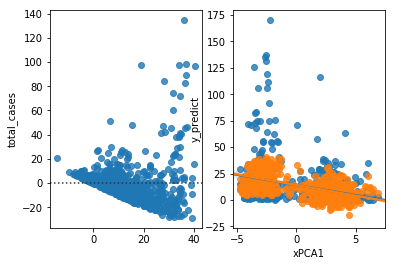

In [167]:
param_grid = {"fit_intercept": [True,False]}

# 构建模型
olsMOdel = LinearRegression(normalize=False,
                                         copy_X=False,
                                         n_jobs=-1)

tuneModel = GridSearchCV(estimator=olsMOdel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)

tuneModel.fit(trainX, trainY)
bestModel_lr = tuneModel.best_estimator_

accModelTrain = getModelAcc(model=bestModel_lr, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_lr, x=testX, y=testY)

accData_lr = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_lr, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

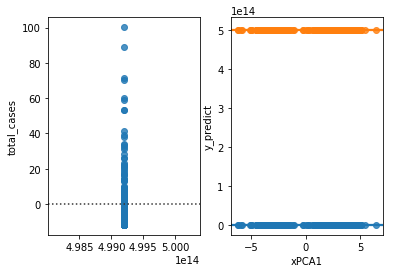

In [168]:
# 绘制残差曲线
resRet = getModelResPlot_t(model=bestModel_lr, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [169]:
accData_lr

,test,train
explained_variance,-0.053480,0.204330
mean_absolute_error,-10.593042,-11.309900
mean_squared_error,-261.411863,-333.755908
median_absolute_error,-7.526904,-7.651528
r2,-0.080528,0.185134


## Lasso

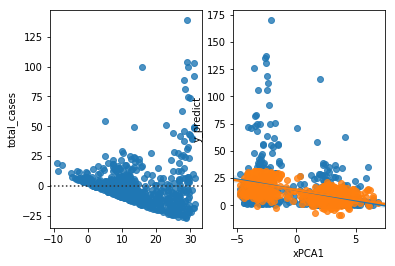

In [123]:
from sklearn.linear_model import Lasso

# 设置模型参数变量空间
param_grid = {"fit_intercept": [True, False],
             "alpha": np.arange(0, 1, 0.1)}

# 构建模型
LassoModel = Lasso(normalize=False,
                                precompute=False,
                                copy_X=True,
                                max_iter=1000,
                                tol=0.0001,
                                warm_start=False,
                                positive=False,
                                random_state=None,
                                selection="cyclic")

tuneModel = GridSearchCV(estimator=LassoModel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
tuneModel.fit(trainX, trainY)
bestModel_lasso = tuneModel.best_estimator_

accModelTrain = getModelAcc(model=bestModel_lasso, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_lasso, x=testX, y=testY)

accData_lasso = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_lasso, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [124]:
accData_lasso

,test,train
explained_variance,0.158422,0.230543
mean_absolute_error,-9.612106,-10.930004
mean_squared_error,-228.411061,-333.327880
median_absolute_error,-7.081702,-7.276576
r2,0.142235,0.210490


## SVM

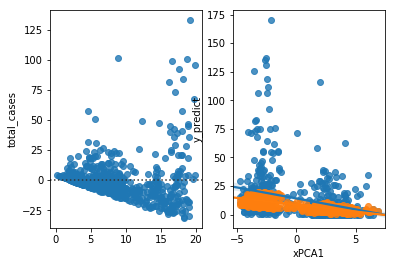

In [126]:
# 设置模型参数变量空间
ncol = len(trainX.columns)
param_grid = {"kernel":["linear","poly","rbf","sigmoid"]}

# 构建模型
SvRModel = SVR(degree=3, gamma="auto",
               coef0=0.0, tol=0.001,
               epsilon=0.1, shrinking=True,
               cache_size=200, verbose=False, max_iter=-1)

tuneModel = GridSearchCV(estimator=SvRModel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
tuneModel.fit(trainX, trainY)
bestModel_svr = tuneModel.best_estimator_

accModelTrain = getModelAcc(model=bestModel_svr, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_svr, x=testX, y=testY)

accData_svr = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_svr, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [127]:
accData_svr

,test,train
explained_variance,0.119066,0.205449
mean_absolute_error,-8.414694,-9.644513
mean_squared_error,-265.323751,-380.840726
median_absolute_error,-4.033508,-4.365923
r2,0.012388,0.126913


## Decision Tree Regressor

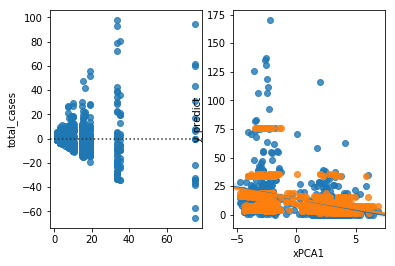

In [128]:
# 设置模型参数变量空间
ncol = len(trainX.columns)
param_grid = {"min_samples_split":np.arange(0.001,0.1,0.01),
              "min_samples_leaf":np.arange(0.0005,0.05,0.01)}

# 构建模型
CartModel = DecisionTreeRegressor(criterion="friedman_mse",
                                 splitter="best", max_depth=None,
                                 max_features=None, random_state=None,
                                 max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 min_impurity_split=None, presort=False)

tuneModel = GridSearchCV(estimator=CartModel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
bestModel_dtr = tuneModel.fit(trainX, trainY).best_estimator_

accModelTrain = getModelAcc(model=bestModel_dtr, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_dtr, x=testX, y=testY)

accData_dtr = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_dtr, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [129]:
accData_dtr

,test,train
explained_variance,-0.158147,0.288529
mean_absolute_error,-10.479146,-10.311209
mean_squared_error,-300.224709,-315.665717
median_absolute_error,-6.286468,-5.449103
r2,-0.192999,0.265883


## SVR2

In [130]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
models = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=10,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

from sklearn.metrics import classification_report
models_svr2 = models.fit(trainX, trainY)

train_error = mean_absolute_error(trainY, models_svr2.predict(trainX))
test_error = mean_absolute_error(testY, models_svr2.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
6.371394559546152
test data MSE
8.401426516221326


## SGD Regressor

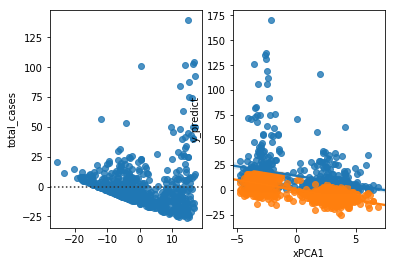

In [131]:
# 设置模型参数变量空间
ncol = len(trainX.columns)
param_grid = {"alpha":np.arange(0.1,1,.1),
              "l1_ratio":np.arange(0.1,1,0.1)}

# 构建模型
GdbtModel = SGDRegressor(loss="squared_loss", penalty="l2",
                         fit_intercept=False,max_iter=None,
                         tol=None, shuffle=True, verbose=0,
                         epsilon=0.1, random_state=None, learning_rate="optimal",
                         eta0=0.01, power_t=0.25, warm_start=False, average=False, n_iter=None)

tuneModel = GridSearchCV(estimator=GdbtModel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
bestModel_sgd = tuneModel.fit(trainX, trainY).best_estimator_

accModelTrain = getModelAcc(model=bestModel_sgd, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_sgd, x=testX, y=testY)

accData_sgd = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_sgd, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [132]:
accData_sgd

,test,train
explained_variance,-2.487030,-24.337830
mean_absolute_error,-12.833522,-15.354748
mean_squared_error,-442.378263,-596.372266
median_absolute_error,-31.510194,-11.798157
r2,-0.341216,-0.795025


## MLP

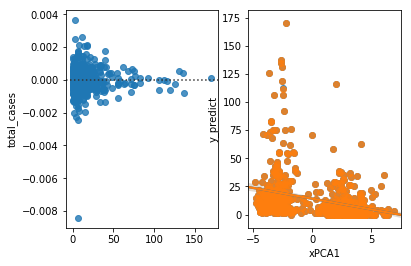

In [133]:
# 设置模型参数变量空间
ncol = len(trainX.columns)
param_grid = {"hidden_layer_sizes":np.arange(ncol,300,50)}

# 构建模型
NnetModel = MLPRegressor(activation="relu",
                         solver="lbfgs", alpha=0.0001,
                         batch_size="auto", learning_rate="adaptive",
                         learning_rate_init=0.001, power_t=0.5,
                         max_iter=20000, shuffle=True, random_state=None,
                         tol=0.0001, verbose=False, warm_start=False,
                         momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                         validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

tuneModel = GridSearchCV(estimator=NnetModel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
bestModel_mlp = tuneModel.fit(trainX, trainY).best_estimator_

accModelTrain = getModelAcc(model=bestModel_mlp, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_mlp, x=testX, y=testY)

accData_mlp = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_mlp, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [134]:
accData_mlp

,test,train
explained_variance,-1.266569,-0.781808
mean_absolute_error,-13.522803,-17.793782
mean_squared_error,-491.652912,-662.791368
median_absolute_error,-9.397173,-11.576270
r2,-1.114699,-0.852463


## XGBoost

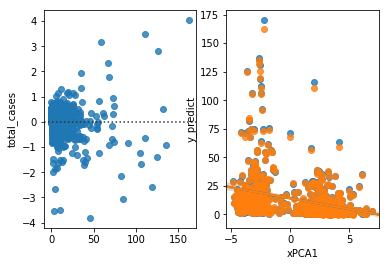

In [218]:
# 设置模型参数变量空间
parm = np.arange(1, 0.8, -0.1)
param_grid = {"gamma":[0.05,0.1,0.3,0.5,0.7,0.9,1],
            "max_depth":[5,8,15,25,30],
            "min_child_weight":[1,3,5,7],
            "subsample":[0.6,0.7,0.8,0.9,1],
            "colsample_bylevel":[0.6,0.7,0.8,0.9,1],
            "reg_alpha":parm,
            "reg_lambda":parm}

# 构建模型
XgbModel = XGBRegressor()
tuneModel = GridSearchCV(estimator=XgbModel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
bestModel_xgb = tuneModel.fit(trainX, trainY).best_estimator_

accModelTrain = getModelAcc(model=bestModel_xgb, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_xgb, x=testX, y=testY)

accData_xgb = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_xgb, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)


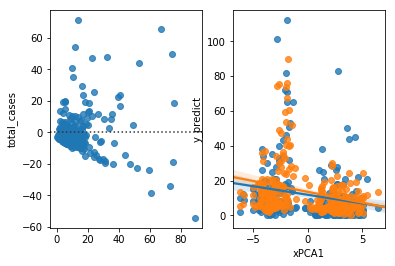

In [219]:
# 绘制残差曲线
resRet = getModelResPlot_t(model=bestModel_xgb, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [220]:
accData_xgb

,test,train
explained_variance,0.110383,0.282443
mean_absolute_error,-8.750066,-9.507636
mean_squared_error,-230.458693,-292.540433
median_absolute_error,-4.939501,-4.891669
r2,0.069295,0.258228


## KNN

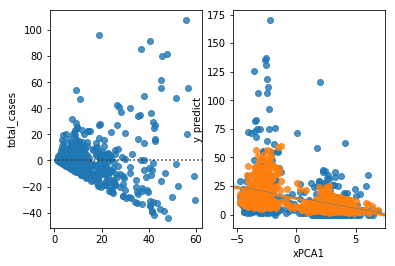

In [135]:
# 设置模型参数变量空间
ncol = len(trainX.columns)
param_grid = {"n_neighbors":np.arange(3,30,2)}

# 构建模型
KnnModel = KNeighborsRegressor(algorithm="auto", leaf_size=30, p=2,
                               metric="minkowski", n_jobs=1, )

tuneModel = GridSearchCV(estimator=KnnModel,
                         param_grid=param_grid,
                         scoring="mean_absolute_error",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
bestModel_knn = tuneModel.fit(trainX, trainY).best_estimator_

accModelTrain = getModelAcc(model=bestModel_knn, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_knn, x=testX, y=testY)

accData_knn = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_knn, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [136]:
accData_knn

,test,train
explained_variance,0.229127,0.335454
mean_absolute_error,-8.906435,-9.707047
mean_squared_error,-216.133609,-282.244044
median_absolute_error,-5.873529,-5.355882
r2,0.209577,0.317648


## PLS

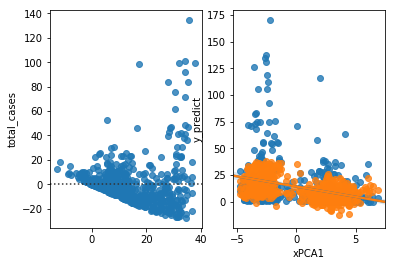

In [173]:
# 设置模型参数变量空间
ncol = len(trainX.columns)
n_c = range(1,ncol//2+2,2)
param_grid = {"n_components":n_c}

# 构建模型
PlsModel = PLSRegression(scale=False, max_iter=500, tol=1e-06, copy=True)

tuneModel = GridSearchCV(estimator=PlsModel,
                         param_grid=param_grid,
                         scoring="r2",
                         fit_params=None, n_jobs=1,
                         iid=True,
                         refit=True,
                         cv=10,
                         return_train_score=True)
bestModel_pls = tuneModel.fit(trainX, trainY).best_estimator_

accModelTrain = getModelAcc(model=bestModel_pls, x=trainX, y=trainY)
accModelTest = getModelAcc(model=bestModel_pls, x=testX, y=testY)

accData_pls = pd.DataFrame({"train": accModelTrain["accData"],
                        "test": accModelTest["accData"]})

# 绘制残差曲线
resRet = getModelResPlot(model=bestModel_pls, trainY=trainY, trainX=trainX,
                         testY=testY, testX=testX)

In [174]:
accData_pls

,test,train
explained_variance,0.085163,0.222073
mean_absolute_error,-10.233451,-11.135979
mean_squared_error,-240.892743,-330.987257
median_absolute_error,-7.429709,-7.507034
r2,0.071750,0.202243


In [199]:
train_error = mean_absolute_error(trainY, bestModel_svr.predict(trainX))
error_svr = mean_absolute_error(testY, bestModel_svr.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_svr)

training data MSE
9.264330683338725
test data MSE
8.343171482081301


In [200]:
train_error = mean_absolute_error(trainY, bestModel_lr.predict(trainX))
error_lr = mean_absolute_error(testY, bestModel_lr.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_lr)

training data MSE
10.898441237933445
test data MSE
499198687132186.2


In [201]:
train_error = mean_absolute_error(trainY, models_svr2.predict(trainX))
error_svr2 = mean_absolute_error(testY, models_svr2.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_svr2)

training data MSE
6.371394559546153
test data MSE
8.401426516221326


In [142]:
train_error = mean_absolute_error(trainY, bestModel_lasso.predict(trainX))
error_lasso = mean_absolute_error(testY, bestModel_lasso.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_lasso)

training data MSE
10.85084999138978
test data MSE
10.477051624921351
MSE
10.76066253647481


In [202]:
train_error = mean_absolute_error(trainY, bestModel_sgd.predict(trainX))
error_sgd = mean_absolute_error(testY, bestModel_sgd.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_sgd)

training data MSE
15.187895563517676
test data MSE
13.512579008903622


In [203]:
train_error = mean_absolute_error(trainY, bestModel_dtr.predict(trainX))
error_dtr = mean_absolute_error(testY, bestModel_dtr.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_dtr)

training data MSE
8.55906244965828
test data MSE
9.58006889656334


In [204]:
train_error = mean_absolute_error(trainY, bestModel_mlp.predict(trainX))
error_mlp = mean_absolute_error(testY, bestModel_mlp.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_mlp)

training data MSE
0.000504836619761675
test data MSE
18.03108055231143


In [205]:
train_error = mean_absolute_error(trainY, bestModel_knn.predict(trainX))
error_knn = mean_absolute_error(testY, bestModel_knn.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_knn)

training data MSE
9.139850057670126
test data MSE
9.216282710802952


In [221]:
train_error = mean_absolute_error(trainY, bestModel_xgb.predict(trainX))
error_xgb = mean_absolute_error(testY, bestModel_xgb.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_xgb)

training data MSE
0.4702717406200428
test data MSE
8.492836248058783


In [207]:
train_error = mean_absolute_error(trainY, bestModel_pls.predict(trainX))
error_pls = mean_absolute_error(testY, bestModel_pls.predict(testX))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(error_pls)

training data MSE
10.884557913802599
test data MSE
10.837638062250361


In [222]:
mae = [error_svr, error_svr2, error_lasso, error_dtr, error_xgb, error_knn, error_mlp, error_sgd, error_pls]

In [223]:
model_name = ['SVM', 'SVM2', 'lasso regression', 'decision tree regression', 'XGBoost', 'knn', 'MLP', 'SGD', 'pls']

In [224]:
errors = pd.DataFrame({'MAE': mae,
                      'Model_Name': model_name})

In [225]:
errors = errors.set_index('Model_Name').sort_values('MAE')

In [226]:
errors

,MAE
Model_Name,
SVM,8.343171
SVM2,8.401427
XGBoost,8.492836
knn,9.216283
decision tree regression,9.580069
lasso regression,10.760663
pls,10.837638
SGD,13.512579
MLP,18.031081


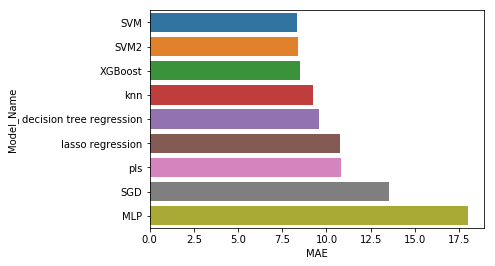

In [227]:
sns.barplot(x="MAE",y=errors.index,data=errors)

# Submission

In [181]:
# read test train x
data3 = pd.read_csv('dengue_features_test.csv')
data3.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.600000,298.492857,298.550000,294.527143,301.100000,296.400000,25.370000,78.781429,78.600000,15.918571,3.128571,26.528571,7.057143,33.300000,21.700000,75.200000
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.560000,298.475714,298.557143,294.395714,300.800000,296.700000,21.830000,78.230000,12.560000,15.791429,2.571429,26.071429,5.557143,30.000000,22.200000,34.300000
2,sj,2008,20,2008-05-13,-0.001500,nan,0.151083,0.091529,3.660000,299.455714,299.357143,295.308571,302.200000,296.400000,4.120000,78.270000,3.660000,16.674286,4.428571,27.928571,7.785714,32.800000,22.800000,3.000000
3,sj,2008,21,2008-05-20,nan,-0.019867,0.124329,0.125686,0.000000,299.690000,299.728571,294.402857,303.000000,296.900000,2.200000,73.015714,0.000000,15.775714,4.342857,28.057143,6.271429,33.300000,24.400000,0.300000
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.760000,299.780000,299.671429,294.760000,302.300000,297.300000,4.360000,74.084286,0.760000,16.137143,3.542857,27.614286,7.085714,33.300000,23.300000,84.100000


In [182]:
datat = data3.fillna(value=data3.quantile(.5))

In [183]:
datat['temperature_gap'] = datat['station_max_temp_c'] - datat['station_min_temp_c']
datat['max_gap'] = datat['station_max_temp_c'] - datat['station_avg_temp_c']
datat['total_prec_avg'] = (datat['station_precip_mm'] + datat['precipitation_amt_mm'] + datat['reanalysis_precip_amt_kg_per_m2'])/3
datat['dur_air_temp'] = datat['reanalysis_max_air_temp_k'] -  datat['reanalysis_min_air_temp_k']

In [184]:
datat['week_start_date'] = pd.to_datetime(datat['week_start_date'], format="%Y-%m-%d")

In [185]:
datat['month'] = datat['week_start_date'].map(lambda x:x.month)

In [186]:
data_quant =  datat[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 
       'temperature_gap', 'max_gap', 'weekofyear', 'month', 'total_prec_avg', 'dur_air_temp']]
normalModelt = StandardScaler(with_mean=True, with_std=True)
normalModelt.fit(data_quant)
data_normt = pd.DataFrame(normalModelt.transform(data_quant),
                             columns=data_quant.columns)

In [187]:
data_catt = datat[['city']]
data_labelt = pd.DataFrame()
class_ = {}
for i in data_catt.columns:
    labelModeli = LabelEncoder()
    labelModeli.fit(data_catt[i])
    class_.update({i: labelModeli.classes_})
    ip = pd.DataFrame({i: labelModeli.transform(data_catt[i])})
    data_labelt = pd.concat([data_labelt, ip], axis=1, ignore_index=False)


onehotModel = OneHotEncoder(n_values='auto', categorical_features='all', sparse=False)
onehotModel.fit(data_labelt)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [188]:
varlablet = list()
for i in list(data_catt.columns):
    univauet = class_.get(i)
    try:
        varN = list(i + ":" + univauet)
    except TypeError:
        varN = []
        for item in univauet:
            varN.append(i +':'+str(item))
    varlablet = varlablet + varN
    
data_onehott = pd.DataFrame(onehotModel.transform(data_labelt),
                                columns=varlablet)

In [189]:
modeltest = pd.concat([data_onehott,data_normt],axis=1)
modeltest.head()

,city:iq,city:sj,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,temperature_gap,max_gap,weekofyear,month,total_prec_avg,dur_air_temp
0,0.000000,1.000000,-0.921587,-1.037251,-1.330152,-1.203412,1.149270,-0.221356,-0.616937,-0.588980,-0.814968,0.237641,-0.343058,-0.504269,1.149270,-0.650878,-0.561890,-0.695842,-0.297700,0.399445,-0.388679,1.192447,0.552057,1.180931,-0.564156,-0.700561,0.700668,-0.607759
1,0.000000,1.000000,-0.915799,-0.990656,-1.592290,-1.409118,-0.735039,-0.233063,-0.611449,-0.675568,-0.912018,0.346676,-0.415679,-0.579261,-0.735039,-0.732773,-0.719570,-1.072605,-0.917778,-1.327124,-0.096397,0.004350,-0.916626,-0.907205,-0.497312,-0.410578,-0.497516,-0.722680
2,0.000000,1.000000,-0.809685,-0.265919,-0.717383,-1.199833,-0.988981,0.436193,0.003219,-0.074156,-0.459119,0.237641,-0.778992,-0.573821,-0.988981,-0.164105,-0.193970,0.457993,0.003481,0.137844,0.254342,-0.904878,-0.066336,-0.214658,-0.430468,-0.410578,-1.125565,-0.397069
3,0.000000,1.000000,-0.091972,-1.044181,-1.056429,-0.827788,-1.093412,0.596190,0.288601,-0.670862,-0.200320,0.419366,-0.818380,-1.288387,-1.093412,-0.742895,-0.218229,0.563958,-0.622503,0.399445,1.189644,-0.983309,-0.491481,0.058164,-0.363624,-0.410578,-1.215364,-0.339608
4,0.000000,1.000000,-0.434751,-0.616221,-1.842901,-1.369907,-1.071727,0.657652,0.244696,-0.435568,-0.426769,0.564747,-0.774068,-1.143064,-1.071727,-0.510091,-0.444641,0.198969,-0.285889,0.399445,0.546624,1.450981,-0.066336,0.383452,-0.296780,-0.410578,-0.274863,-0.550298


In [190]:
modelDataX.shape

(875, 27)

In [191]:
modeltest = modeltest.drop('reanalysis_sat_precip_amt_mm', axis=1)

In [192]:
data_sub = pd.read_csv('submission_format.csv').drop('total_cases', axis=1)
data_sub.head()

,city,year,weekofyear
0,sj,2008,18
1,sj,2008,19
2,sj,2008,20
3,sj,2008,21
4,sj,2008,22


In [228]:
y_pred_svr = bestModel_svr.predict(modeltest)
# y_pred_lr = bestModel_lr.predict(modeltest)
y_pred_lasso = bestModel_lasso.predict(modeltest)
y_pred_dtr = bestModel_dtr.predict(modeltest)
y_pred_svr2 = models_svr2.predict(modeltest)
y_pred_sgd = bestModel_sgd.predict(modeltest)
y_pred_knn = bestModel_knn.predict(modeltest)
y_pred_xgb = bestModel_xgb.predict(modeltest)
y_pred_mlp = bestModel_mlp.predict(modeltest)
y_pred_pls = bestModel_pls.predict(modeltest)

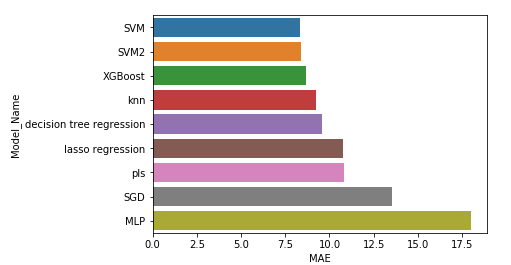

In [236]:
y_pred = y_pred_svr * 0.20  + y_pred_lasso * 0.07 + y_pred_dtr * 0.1 + y_pred_svr2 * 0.05 + y_pred_sgd * 0.03 + y_pred_knn * 0.15 + y_pred_xgb * 0.3 + y_pred_mlp * 0.03 + y_pred_pls.ravel() * 0.07

In [237]:
res_int = np.round(y_pred).astype('int')

In [238]:
data_sub['total_cases'] = res_int

In [239]:
data_sub.to_csv('res_12_all.csv', index=False)

# Score

In [388]:
score = [33.3221, 32.6226, 32.5649, 30.9135, 30.3221, 29.9255, 28.0649, 26.6394, 26.5673, 26.4351, 26.33, 26.2404]

In [389]:
times_tried = [1,2,3,4,5,6,7,8,9,10,11,12]

In [390]:
score_df = pd.DataFrame({'times tried': times_tried,
                        })

In [391]:
score_df['mean absolute error'] = score

In [392]:
score_df

,times tried,mean absolute error
0,1,33.322100
1,2,32.622600
2,3,32.564900
3,4,30.913500
4,5,30.322100
5,6,29.925500
6,7,28.064900
7,8,26.639400
8,9,26.567300
9,10,26.435100


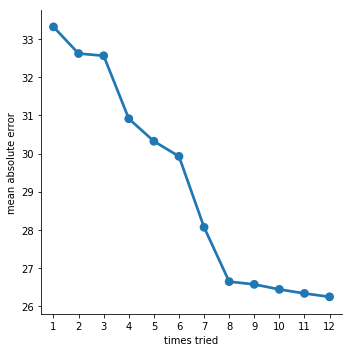

In [393]:
sns.factorplot(x="times tried", y='mean absolute error', data=score_df, kind="point", ci=None, size=5)

# Important Charactrastic of Dengue Fever

In [382]:
cols = data.columns.tolist()

In [383]:
cols.insert(0, cols.pop(cols.index('total_cases')))

In [384]:
data = data.reindex(columns= cols)

In [387]:
data.describe()

,total_cases,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,temperature_gap,max_gap,month
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,24.675137,26.503434,0.140498,0.130227,0.203666,0.202111,45.694135,298.701472,299.226016,295.249065,303.420055,295.722459,40.063173,82.149181,45.694135,16.748767,4.889698,27.192532,8.036903,32.457212,22.103091,39.092514,10.334615,5.249374,6.418269
std,43.596000,15.019437,0.130908,0.117847,0.073305,0.083281,43.525407,1.357737,1.257383,1.522899,3.224583,2.556842,43.298015,7.130928,43.525407,1.537442,3.538279,1.273696,2.100818,1.946226,1.566504,47.133032,2.315318,1.267139,3.451806
min,0.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,5.500000,2.571429,1.000000
25%,5.000000,13.750000,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,301.000000,293.900000,13.200000,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000,8.400000,4.285714,3.750000
50%,12.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,10.000000,5.100000,6.500000
75%,28.000000,39.250000,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,305.500000,297.900000,52.042500,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000,11.900000,6.100000,9.000000
max,461.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,20.400000,11.400000,12.000000


### Firstly, our best model will tell use which are the most important characteristics of a fraudulent user

In [399]:
select = SelectFromModel(bestModel_xgb, threshold=0.001, prefit=False)

In [400]:
select = select.fit(modelDataX, data["total_cases"])
res_col = modelDataX.columns[select.get_support(indices=False)]

In [401]:
res_col

Index(['city:iq', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'temperature_gap', 'max_gap',
       'weekofyear', 'month'],
      dtype='object')

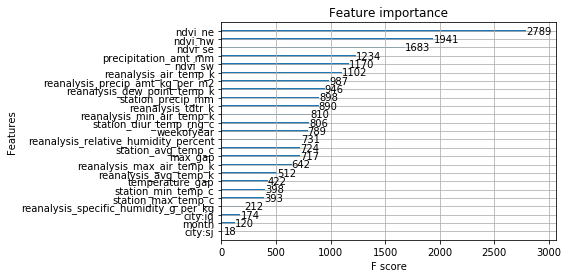

In [402]:
plot_importance(bestModel_xgb)
plt.show()

In [397]:
np.round(bestModel_xgb.feature_importances_,3)

array([0.008, 0.001, 0.132, 0.092, 0.08 , 0.055, 0.058, 0.052, 0.024,
       0.045, 0.03 , 0.038, 0.047, 0.035, 0.01 , 0.042, 0.034, 0.038,
       0.019, 0.019, 0.043, 0.02 , 0.034, 0.037, 0.006], dtype=float32)

In [403]:
trainX.columns

Index(['city:iq', 'city:sj', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'temperature_gap', 'max_gap',
       'weekofyear', 'month'],
      dtype='object')

In [419]:
data_fc = pd.DataFrame()

## City
City sj has a higher Dengue Fever rate

In [407]:
data1[data1['city']=='iq']['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [408]:
data1[data1['city']=='sj']['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [412]:
data_y = data1[(data1['year'] > 1999) & (data1['year'] < 2009)]

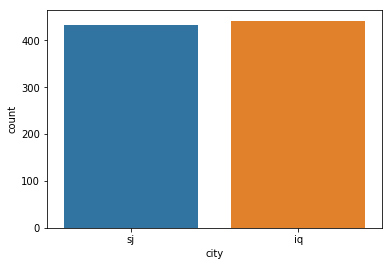

In [413]:
sns.countplot(x='city', data=data_y)

In [416]:
data_y = pd.merge(data_y, data2, how='left', on=['city', 'year', 'weekofyear'])

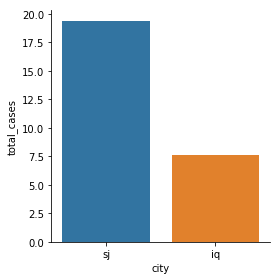

In [417]:
sns.factorplot(x="city", y='total_cases', data=data_y, kind="bar", ci=None)

## ndvi_ne
ndvi_ne from 0 to 0.2 have a higher Dengue Fever rate

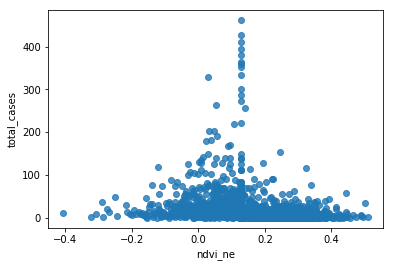

In [422]:
sns.regplot(x="ndvi_ne", y="total_cases", fit_reg=False, data=data)

## ndvi_nw
ndvi_nw from 0 to 0.2 have a higher Dengue Fever rate

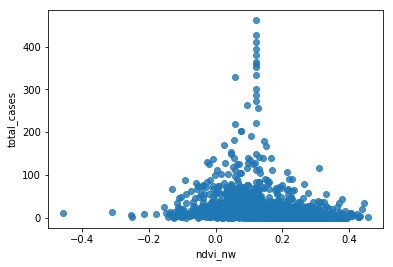

In [423]:
sns.regplot(x="ndvi_nw", y="total_cases", fit_reg=False, data=data)

## ndvi_se
Around 0.2 ndvi_se have a higher Dengue Fever rate

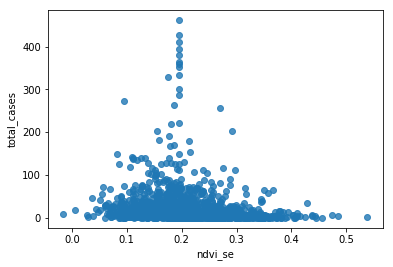

In [425]:
sns.regplot(x="ndvi_se", y="total_cases", fit_reg=False, data=data)

## ndvi_sw
Around 0.2 ndvi_sw have a higher Dengue Fever rate

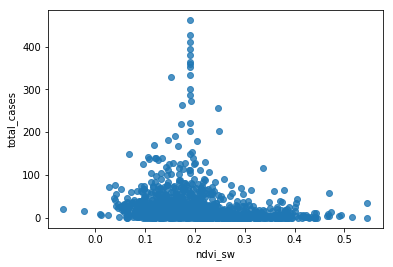

In [427]:
sns.regplot(x="ndvi_sw", y="total_cases", fit_reg=False, data=data)

## precipitation_amt_mm
Dengue Fever has a high rate when precipitation_amt_mm is low

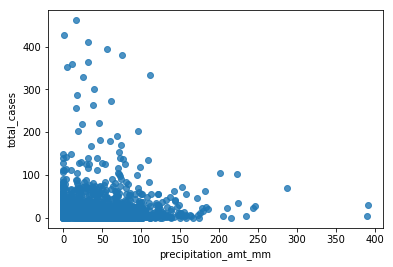

In [429]:
sns.regplot(x="precipitation_amt_mm", y="total_cases", fit_reg=False, data=data)

## reanalysis_air_temp_k
Dengue Fever has a higher rate when reanalysis_air_temp_k is around 299.5

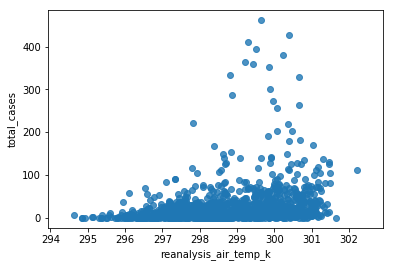

In [431]:
sns.regplot(x="reanalysis_air_temp_k", y="total_cases", fit_reg=False, data=data)

## reanalysis_avg_temp_k
Dengue Fever has a higher rate when reanalysis_avg_temp_k is around 299.5

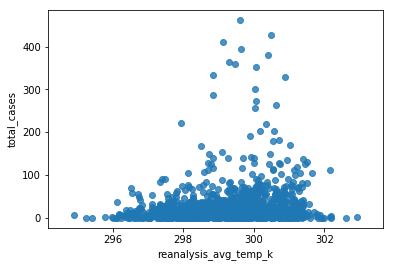

In [434]:
sns.regplot(x="reanalysis_avg_temp_k", y="total_cases", fit_reg=False, data=data)

## reanalysis_dew_point_temp_k
Dengue Fever has a higher rate when reanalysis_dew_point_temp_k is around 295.5

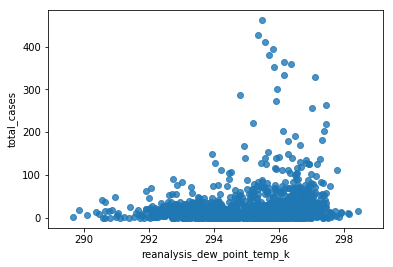

In [436]:
sns.regplot(x="reanalysis_dew_point_temp_k", y="total_cases", fit_reg=False, data=data)

## reanalysis_max_air_temp_k
Dengue Fever has a higher rate when reanalysis_max_air_temp_k is around 303

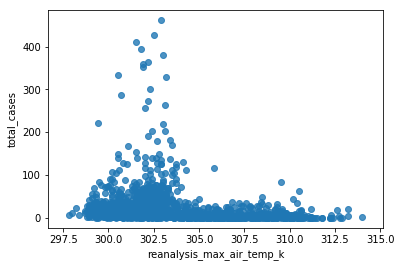

In [439]:
sns.regplot(x="reanalysis_max_air_temp_k", y="total_cases", fit_reg=False, data=data)

## reanalysis_min_air_temp_k
Dengue Fever has a higher rate when reanalysis_min_air_temp_k is around 298

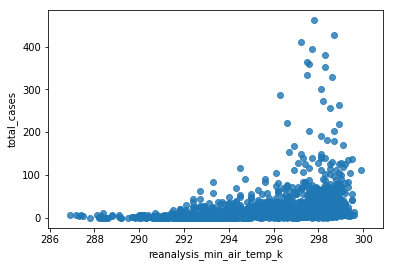

In [441]:
sns.regplot(x="reanalysis_min_air_temp_k", y="total_cases", fit_reg=False, data=data)

## reanalysis_precip_amt_kg_per_m2
Dengue Fever has a higher rate when reanalysis_precip_amt_kg_per_m2 is low

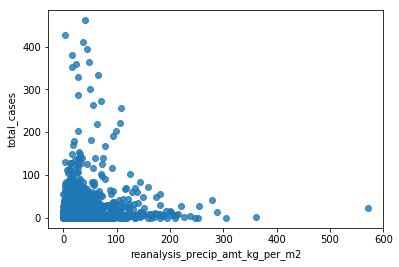

In [444]:
sns.regplot(x="reanalysis_precip_amt_kg_per_m2", y="total_cases", fit_reg=False, data=data)

## reanalysis_relative_humidity_percent
Dengue Fever has a higher rate when reanalysis_relative_humidity_percent is around 80

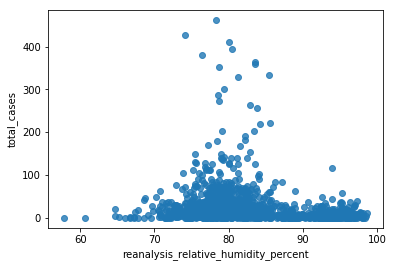

In [446]:
sns.regplot(x="reanalysis_relative_humidity_percent", y="total_cases", fit_reg=False, data=data)

## reanalysis_specific_humidity_g_per_kg
Dengue Fever has a higher rate when reanalysis_specific_humidity_g_per_kg is around 18

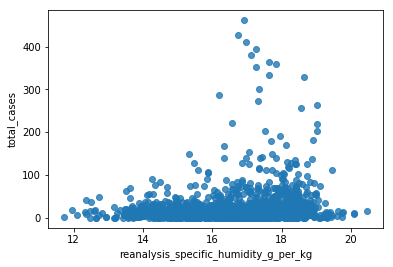

In [448]:
sns.regplot(x="reanalysis_specific_humidity_g_per_kg", y="total_cases", fit_reg=False, data=data)

## reanalysis_tdtr_k
Dengue Fever has a higher rate when reanalysis_tdtr_k is from 2 to 4

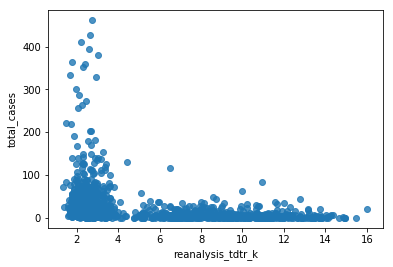

In [450]:
sns.regplot(x="reanalysis_tdtr_k", 3y="total_cases", fit_reg=False, data=data)

## station_avg_temp_c
Dengue Fever has a higher rate when station_avg_temp_c is around 28

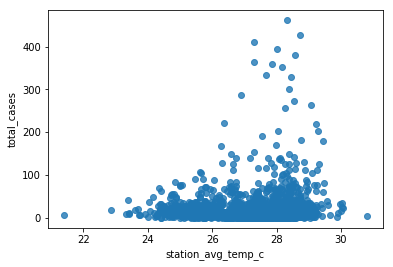

In [452]:
sns.regplot(x="station_avg_temp_c", y="total_cases", fit_reg=False, data=data)

## station_diur_temp_rng_c
Dengue Fever has a higher rate when station_diur_temp_rng_c is around 7

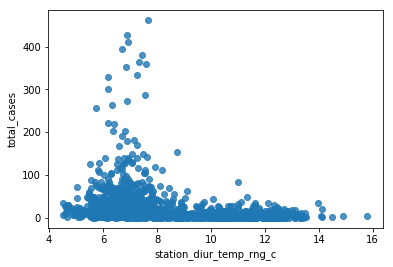

In [453]:
sns.regplot(x="station_diur_temp_rng_c", y="total_cases", fit_reg=False, data=data)

## station_max_temp_c
Dengue Fever has a higher rate when station_max_temp_c is around 33

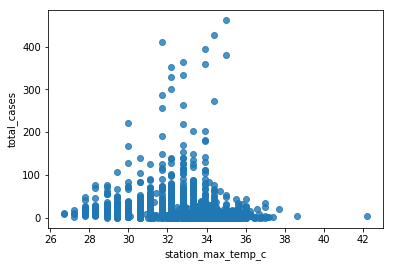

In [454]:
sns.regplot(x="station_max_temp_c", y="total_cases", fit_reg=False, data=data)

## station_min_temp_c
Dengue Fever has a higher rate when station_min_temp_c is around 24

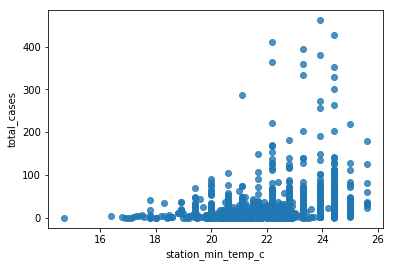

In [455]:
sns.regplot(x="station_min_temp_c", y="total_cases", fit_reg=False, data=data)

## station_precip_mm
Dengue Fever has a higher rate when station_precip_mm is low or around 50

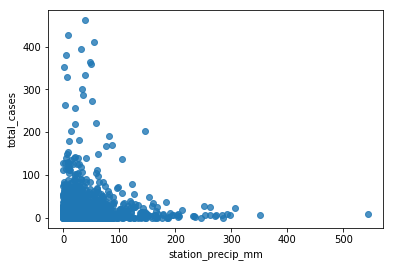

In [456]:
sns.regplot(x="station_precip_mm", y="total_cases", fit_reg=False, data=data)

## weekofyear
Dengue Fever has a higher rate when weekofyear is around 40 (30-50)

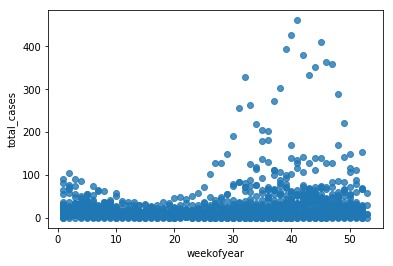

In [460]:
sns.regplot(x="weekofyear", y="total_cases", fit_reg=False, data=data)

## month
Dengue Fever has a higher rate when month is around 10 (8-11)

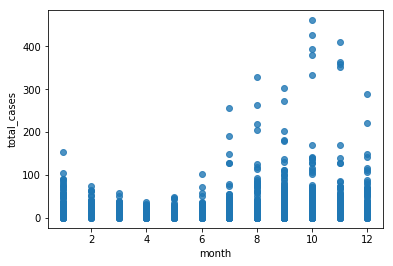

In [461]:
sns.regplot(x="month", y="total_cases", fit_reg=False, data=data)